<a href="https://colab.research.google.com/github/techsidh/laptop_price_prediction_scrach/blob/main/laptop_price_prediction_scrach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

import warnings

In [ ]:
final = pd.DataFrame()
for i in range(1,46):
  url = requests.get("https://www.flipkart.com/laptops/pr?sid=6bo%2Cb5g&otracker=categorytree&fm=neo%2Fmerchandising&iid=M_9443bafe-782b-470d-8df7-6de36e9e00c5_1_372UD5BXDFYS_MC.34WHNYFH5V2Y&otracker=hp_rich_navigation_8_1.navigationCard.RICH_NAVIGATION_Electronics%7ELaptop%2Band%2BDesktop_34WHNYFH5V2Y&otracker1=hp_rich_navigation_PINNED_neo%2Fmerchandising_NA_NAV_EXPANDABLE_navigationCard_cc_8_L1_view-all&cid=34WHNYFH5V2Y&page={}".format(i)).text
  soup = BeautifulSoup(url)

  product = []
  price = []
  rating = []


  for i in soup.findAll('a',href = True, attrs = {'class':'_1fQZEK'}):
    name = i.find('div',attrs={'class':'_4rR01T'})
    rate = i.find('div',attrs = {'class':'_30jeq3 _1_WHN1'})
    stars= i.find('div',attrs = {'class':'_3LWZlK'})


    product.append(name.text)
    price.append(rate.text)
    rating.append(stars)

  df = pd.DataFrame({'Product_name':product,
                     'Price':price,
                     'Rating':rating
                     })
  final = final.append(df,ignore_index = True);


<ipython-input-73-c9779a186e99>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final = final.append(df,ignore_index = True);
<ipython-input-73-c9779a186e99>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final = final.append(df,ignore_index = True);
<ipython-input-73-c9779a186e99>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final = final.append(df,ignore_index = True);
<ipython-input-73-c9779a186e99>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final = final.append(df,ignore_index = True);
<ipython-input-73-c9779a186e99>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

In [ ]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product_name  439 non-null    object
 1   Price         439 non-null    object
 2   Rating        334 non-null    object
dtypes: object(3)
memory usage: 10.4+ KB


In [ ]:
final.head()

,Product_name,Price,Rating
0,Acer Nitro 5 Core i5 12th Gen - (16 GB/512 GB ...,"₹76,990","[4.3, []]"
1,Primebook 4G Android Based MediaTek MT8788 - (...,"₹18,990","[4, []]"
2,ASUS Vivobook 15 Core i5 11th Gen - (8 GB/512 ...,"₹42,990","[4.2, []]"
3,ASUS Vivobook 15 Core i3 11th Gen - (8 GB/512 ...,"₹34,990","[4.3, []]"
4,realme Book (Slim) Core i3 11th Gen - (8 GB/25...,"₹32,364","[4.4, []]"


In [ ]:
final['Product_name'][111]

'Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U - (8 GB/512 GB SSD/Windows 11 Home) 15ALC6 Thin and Light Lap...'

In [ ]:
product_names = final['Product_name']
# Extracting the first two words from each product name
final['Company'] = product_names.apply(lambda x:' '.join(x.split()[:1]))

In [ ]:
ram = []

window = []
for i in final['Product_name']:
#ram
  a = i.find("GB")
  a_val = i[:a]
  ram.append(a_val)

#ssd

final['RAM'] = ram

In [ ]:
final['RAM'] = final['RAM'].str.split().str[-1]
final['RAM'] = final['RAM'].apply(lambda x:x.lstrip('('))

In [ ]:
final['RAM']

0      16
1       4
2       8
3       8
4       8
       ..
434     8
435    16
436     8
437     4
438     8
Name: RAM, Length: 439, dtype: object

In [ ]:
final['Rating'][1]

<div class="_3LWZlK">4</div>

In [ ]:
final["Rating"] = final["Rating"].astype(str)
final['Rating'] = final['Rating'].apply(lambda x : x.rstrip('<img class="_1wB99o" src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg=="/>').lstrip('<div class="_3LWZlK">'))

In [ ]:
final.drop(['Product_name'],axis = 1,inplace = True)

In [ ]:
final['Price'] = final['Price'].str.replace('₹','')
final['Price'] = final['Price'].str.replace(',','')

final['Price'] = final['Price'].astype(int)

In [ ]:
final.sample(5)

,Price,Rating,Company,RAM
206,43975,4.,Lenovo,8
240,45280,4.,HP,8
162,37990,4.,ASUS,8
316,48999,4.,HP,8
4,32364,4.,realme,8


In [ ]:
final.to_csv('laptop_price.csv',index = False)

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [103]:
df = pd.read_csv("/content/drive/MyDrive/deep/laptop_price.csv")

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Price    469 non-null    int64 
 1   Rating   303 non-null    object
 2   Company  469 non-null    object
 3   RAM      469 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 14.8+ KB


In [105]:
df

,Price,Rating,Company,RAM
0,18990,NaN,Primebook,4
1,72990,NaN,ASUS,16
2,42990,4.,ASUS,8
3,34990,4.,ASUS,8
4,32364,4.,realme,8
...,...,...,...,...
464,56200,4.,Acer,8
465,58020,NaN,HP,8
466,51999,NaN,DELL,4
467,72990,NaN,ASUS,16


<Axes: >

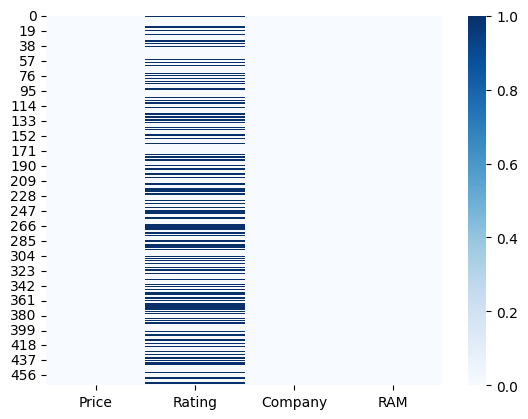

In [106]:
sns.heatmap(df.isna(),cmap = "Blues")

In [107]:
df['Rating'] = df['Rating'].replace(np.nan,0)
df['Rating'] = df['Rating'].replace('.',0)


In [108]:
df['Rating'] = df['Rating'].astype(str)
df['Rating'] = df['Rating'].apply(lambda x:x.rstrip('.').lstrip('.'))


In [109]:
df.Rating.value_counts()

4           254
0           191
7             8
4.8           7
8             6
4.7           2
2lA32">2      1
Name: Rating, dtype: int64

In [110]:
df[df['Rating'] == '2lA32">2']

,Price,Rating,Company,RAM
185,58990,"2lA32"">2",MSI,8


In [111]:
df.replace({'Rating':{'2lA32">2.7':'2.7','2lA32">2':'2'}},inplace = True)
df['Rating'] = df['Rating'].astype(float)

In [112]:
df.sample(5)

,Price,Rating,Company,RAM
116,52100,0.0,DELL,8
320,54790,4.0,Acer,8
185,58990,2.0,MSI,8
323,72990,0.0,ASUS,16
335,49990,4.0,Lenovo,8


<Axes: >

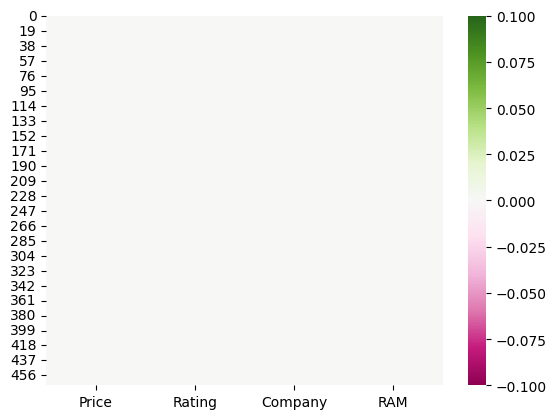

In [113]:
sns.heatmap(df.isna(),cmap = "PiYG")

<Axes: ylabel='RAM'>

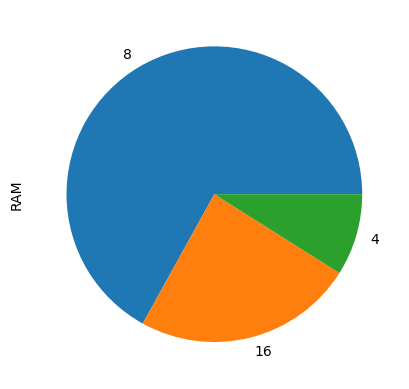

In [114]:
(df['RAM'].value_counts(normalize = True)*100).plot(kind = 'pie')

In [115]:
df['Company'].replace('Primebook','MediaTek',inplace = True)

In [116]:
df['Company'].replace("BRTXWWFHXYBN","Lenovo",inplace = True)

<Axes: >

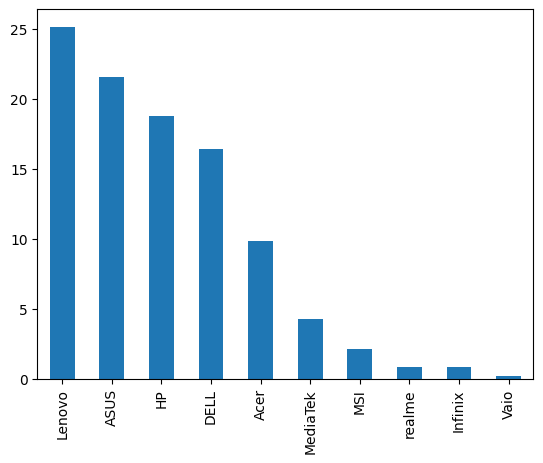

In [117]:
(df['Company'].value_counts(normalize = True)*100).plot(kind = 'bar')

Text(0, 0.5, 'Price of Laptop')

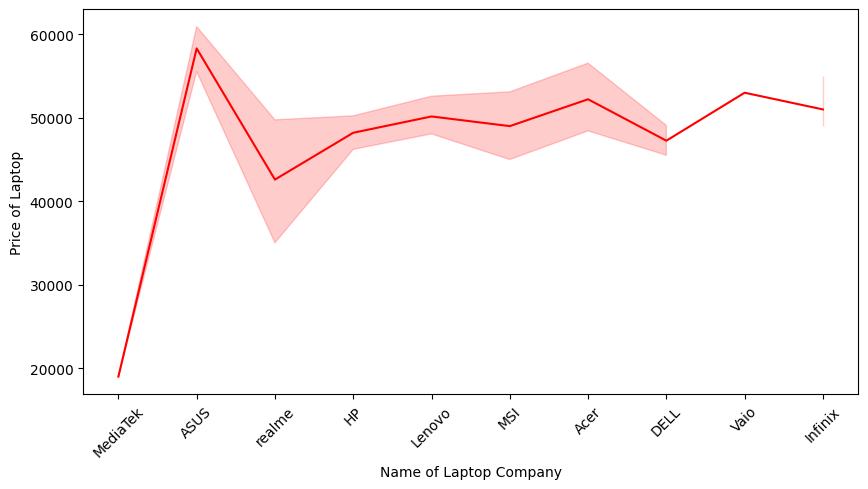

In [118]:
#lets see price of product vary based on company
plt.figure(figsize = (10,5))
sns.lineplot(x = df.Company,y = df.Price,color='red')
plt.xlabel('Name of Laptop Company')
plt.xticks(rotation = 45)
plt.ylabel('Price of Laptop')

Text(0, 0.5, 'Price of Laptop')

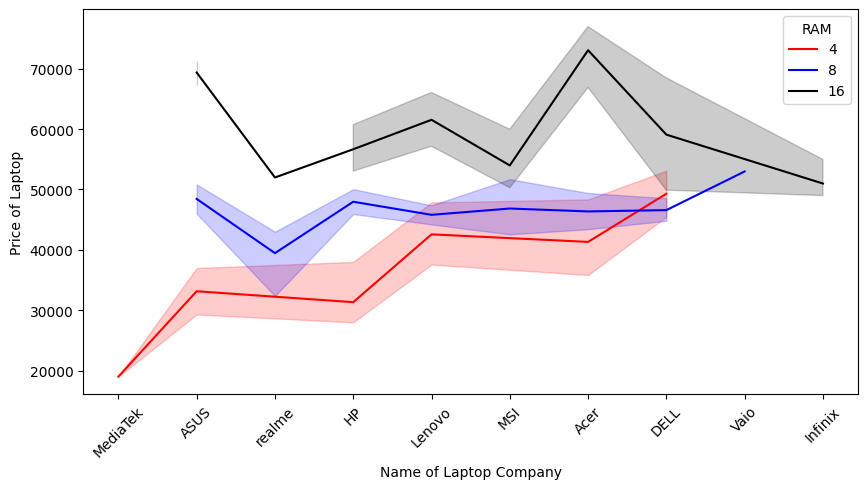

In [119]:
#lets see price of product vary based on company and RAM
plt.figure(figsize = (10,5))
sns.lineplot(x = df.Company,y = df.Price,hue = df.RAM,palette=['red','blue','black'])
plt.xlabel('Name of Laptop Company')
plt.xticks(rotation = 45)
plt.ylabel('Price of Laptop')

<Axes: xlabel='Company', ylabel='Rating'>

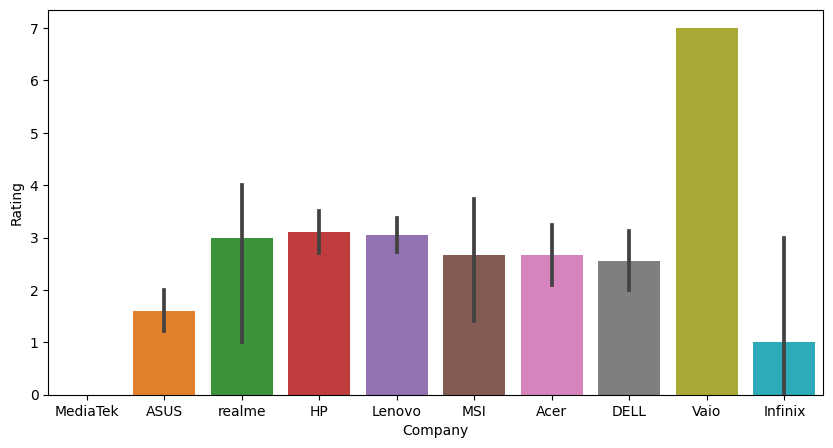

In [120]:
#least and high rate company

plt.figure(figsize = (10,5))
sns.barplot(x = df.Company,y = df.Rating)

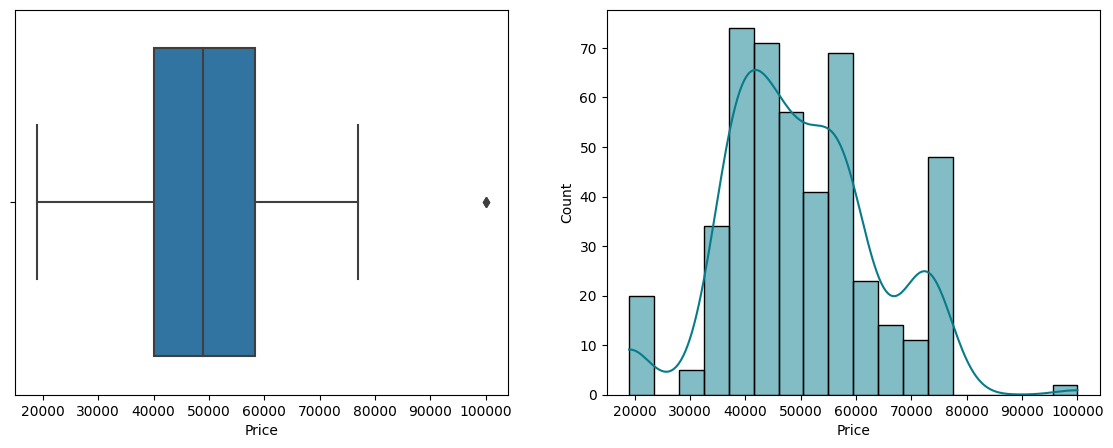

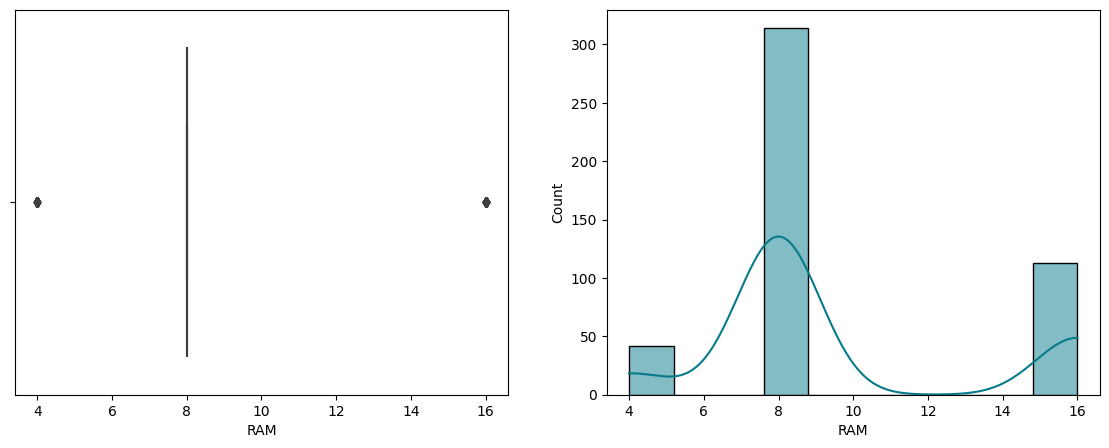

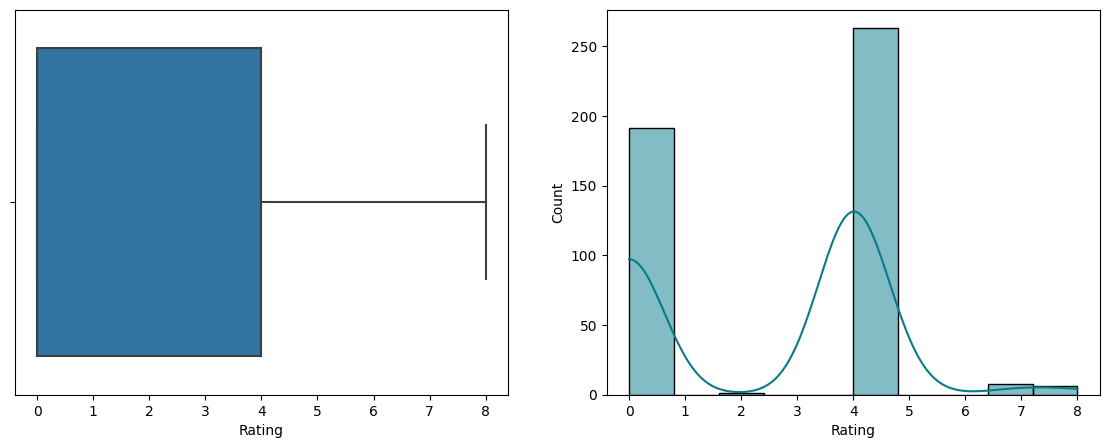

In [121]:
outliers = df[['Price','RAM','Rating']]
for i in outliers.columns:
  n =1
  plt.figure(figsize=(14,5))
  plt.subplot(1,2,n)
  n +=1
  feature = outliers[i]
  sns.boxplot(x =df[i],data = df)
  plt.subplot(1,2,n)
  n +=1
  sns.histplot(df[i], color='#077b8a',kde=True)
  plt.show();

<Axes: xlabel='Price'>

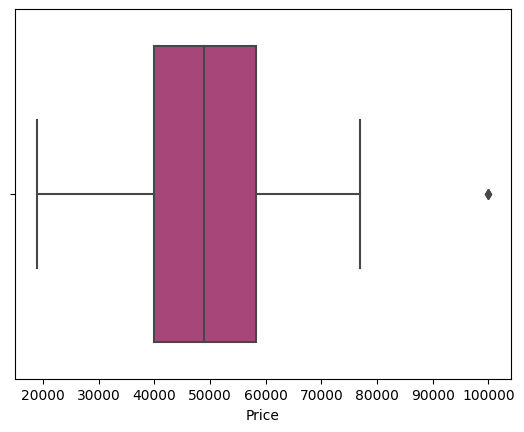

In [122]:
sns.boxplot(x = df['Price'],palette = 'magma')

<Axes: xlabel='Rating'>

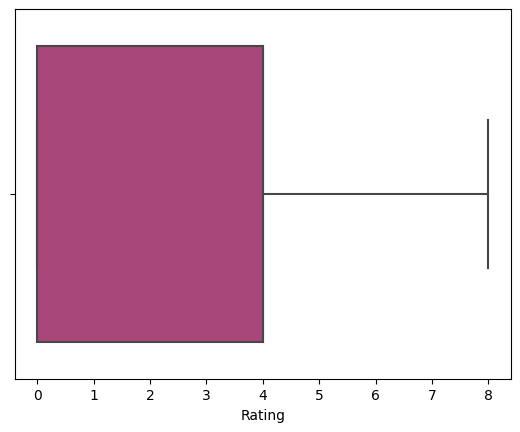

In [123]:
sns.boxplot(x = df['Rating'],palette = 'magma')

<Axes: xlabel='Rating', ylabel='Price'>

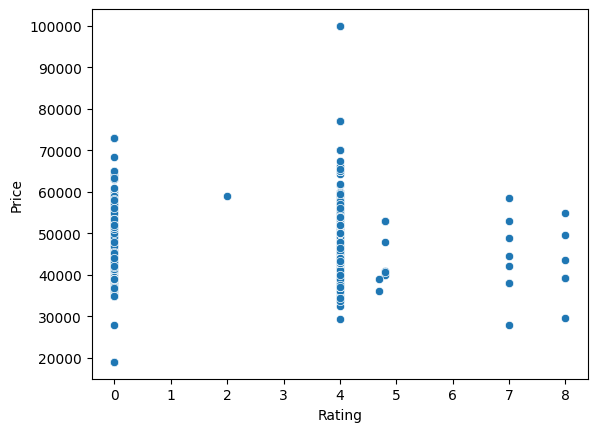

In [124]:
sns.scatterplot(x = df['Rating'],y = df['Price'])

/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


<Axes: xlabel='RAM', ylabel='Price'>

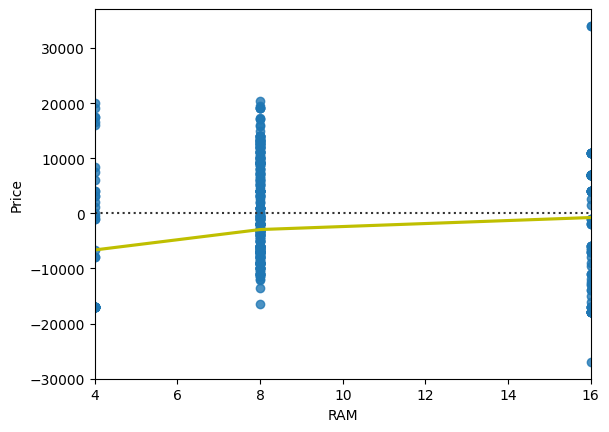

In [125]:

sns.residplot(data=df, x="RAM", y="Price", lowess=True, line_kws=dict(color="y"))

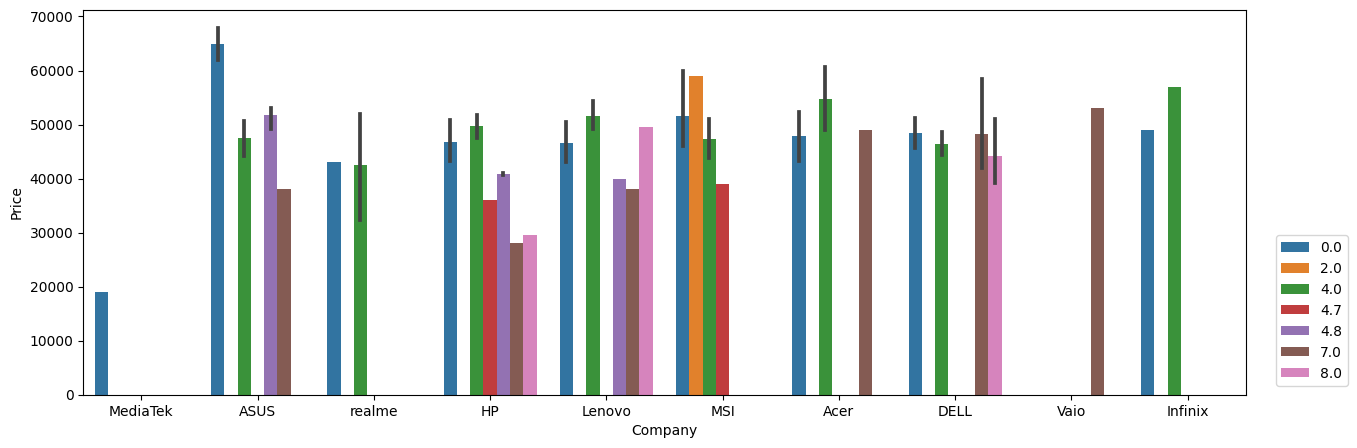

In [126]:
plt.figure(figsize = (15,5))
sns.barplot(data = df,x = df['Company'],y = df['Price'],hue = df['Rating'])
plt.legend(bbox_to_anchor = (1.02,0.005),loc = "lower left")

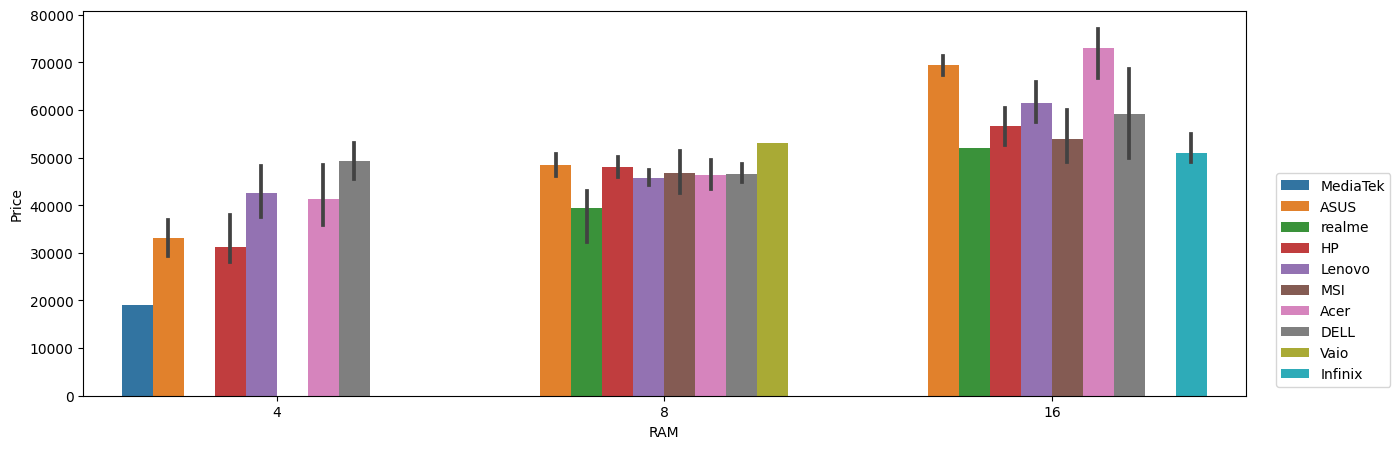

In [127]:
plt.figure(figsize = (15,5))
sns.barplot(data = df,x = df['RAM'],y = df['Price'] ,hue = df['Company'])
plt.legend(bbox_to_anchor = (1.02,0.005),loc = "lower left")

<ipython-input-128-05ffd82f285f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target_4[['Price']], hist=False, rug=True)
<ipython-input-128-05ffd82f285f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target_8[['Price']], hist=False, rug=True)
<ipython-input-128-05ffd82f2

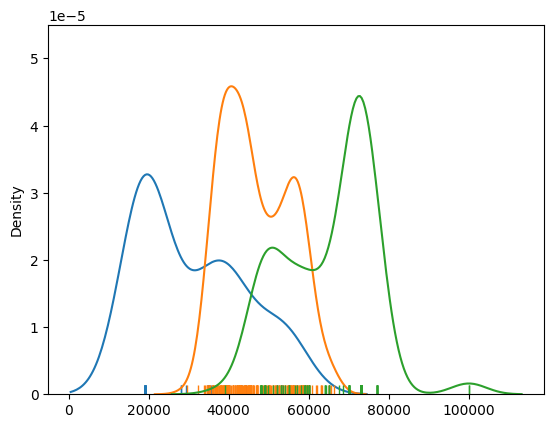

In [128]:
target_4 = df.loc[df['RAM'] == 4]
target_8 = df.loc[df['RAM'] == 8]
target_16 = df.loc[df['RAM'] == 16]

sns.distplot(target_4[['Price']], hist=False, rug=True)
sns.distplot(target_8[['Price']], hist=False, rug=True)
sns.distplot(target_16[['Price']], hist=False, rug=True);

<ipython-input-129-6d7ede3e4ee8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap = 'Pastel2', annot = True,linewidths=0.2,linecolor='orange')


<Axes: >

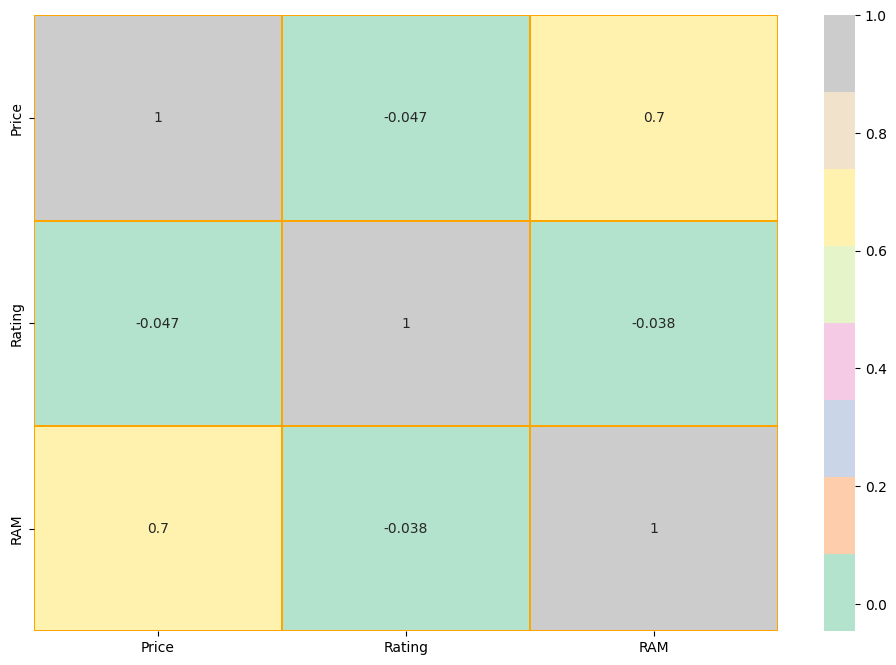

In [129]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),cmap = 'Pastel2', annot = True,linewidths=0.2,linecolor='orange')

no correlation

In [130]:
df['Company'].unique()

array(['MediaTek', 'ASUS', 'realme', 'HP', 'Lenovo', 'MSI', 'Acer',
       'DELL', 'Vaio', 'Infinix'], dtype=object)

In [131]:
X = df.drop('Price',axis =1)
y = df['Price']

In [132]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [133]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

transformer = ColumnTransformer(transformers=[
    ('tnf1',OrdinalEncoder(categories=[['MediaTek', 'ASUS', 'realme', 'HP', 'Lenovo', 'MSI', 'Acer',
       'DELL', 'Vaio', 'Infinix']]),['Company'])],remainder='passthrough')

In [134]:
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [135]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


In [136]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor